In [3]:
import numpy as np
import struct
import random
import matplotlib.pyplot as plt
import pandas as pd
import math
import cv2

In [25]:
def convolution(image, kernel):
    image_rows, image_cols, image_channel = image.shape
    kernel_rows, kernel_cols = kernel.shape
    kernel_half_row = kernel_rows // 2
    kernel_half_col = kernel_cols // 2
    output = np.zeros((image_rows - kernel_half_row * 2, image_cols - kernel_half_col * 2, image_channel))
    for image_row in range(kernel_half_row, image_rows - kernel_half_row):
        for image_col in range(kernel_half_col, image_cols - kernel_half_col):
            for kernel_row in range(kernel_rows):
                for kernel_col in range(kernel_cols):
                    o_index = image_row - kernel_half_row, image_col - kernel_half_col
                    k_index = kernel_row, kernel_col
                    i_index = image_row - kernel_half_row + kernel_row, image_col - kernel_half_col + kernel_col
                    r = kernel[k_index] * image[i_index]
#                     print(f'output[{o_index}] += kernel[{k_index}] * image[{i_index}] = {r}')
                    output[o_index] += r
    return output

image = np.array([
    [[1,2,3],[1,2,3],[1,2,3]],
    [[4,5,6],[4,5,6],[4,5,6]],
    [[7,8,9],[7,8,9],[7,8,9]]
])
image = np.hstack([image, image])
image = np.vstack([image, image])
image.shape
kernel = np.array([[1,2,3],[4,5,6],[7,8,9]])

convolution(image, kernel)

array([[[234., 279., 324.],
        [234., 279., 324.],
        [234., 279., 324.],
        [234., 279., 324.]],

       [[153., 198., 243.],
        [153., 198., 243.],
        [153., 198., 243.],
        [153., 198., 243.]],

       [[153., 198., 243.],
        [153., 198., 243.],
        [153., 198., 243.],
        [153., 198., 243.]],

       [[234., 279., 324.],
        [234., 279., 324.],
        [234., 279., 324.],
        [234., 279., 324.]]])

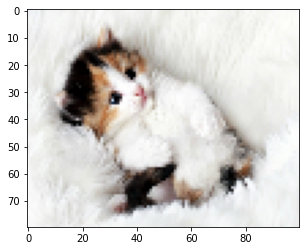

In [26]:
image = cv2.imread("x.jpg")
image = cv2.resize(image, (100, 80))
plt.imshow(image[..., ::-1])

In [4]:
image.shape

(80, 100, 3)

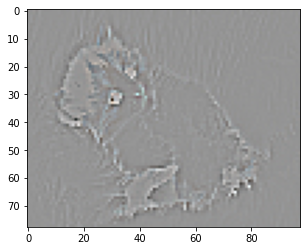

In [27]:
# Laplacian 核
kernel = np.array(
    [
        [1, 1, 1], 
        [1, -8, 1], 
        [1, 1, 1]
    ]).astype(np.float32)

output = convolution(image, kernel)
output = (output - np.min(output)) / (np.max(output) - np.min(output))
plt.imshow(output[..., ::-1])

## $
g(x, y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}
$

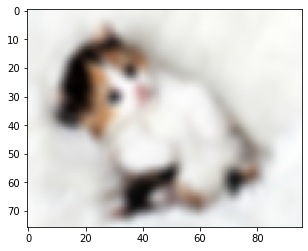

In [35]:
# 高斯核
def gaussian_kernel2d(size, sigma):
    
    s = 2 * np.pi * sigma ** 2
    center = size // 2
    output = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            y = i - center
            x = j - center
            output[i, j] = np.exp(-(x ** 2 + y ** 2) / s)
    return output / np.sum(output)

kernel = gaussian_kernel2d(5, 1)
output = convolution(image, kernel)
output = (output - np.min(output)) / (np.max(output) - np.min(output))
plt.imshow(output[..., ::-1])